In [3]:
import pandas as pd
import numpy as np
from pandas import read_csv

In [4]:
#import data

file = '/Users/ziyuanjiang/dstoolbox/AS2/Movie_database_BritishAmerican2000-2021.csv'
file_op = open(file,encoding='UTF-8')
names = ['IMDbRating','Title','Year','Genre','Plot','Actors']
data = read_csv(file_op, names=names)
data.head()

,IMDbRating,Title,Year,Genre,Plot,Actors
0,7.1,Aberdeen,2000,Drama,"Kaisa is a Scot, a successful London lawyer, w...","Stellan Skarsgård, Lena Headey, Jean Johansson"
1,4.1,The Asylum,2000,"Drama, Horror, Thriller","Plagued by endless visions and nightmares, Jen...","Steffanie Pitt, Nick Waring, Ingrid Pitt"
2,6.6,The Beach,2000,"Adventure, Drama, Romance",Garland's novel centers on a young nicotine-ad...,"Leonardo DiCaprio, Tilda Swinton, Daniel York"
3,5.6,Beautiful Joe,2000,"Comedy, Drama","In the Bronx, Joe (Sir Billy Connolly), an Iri...","Sharon Stone, Billy Connolly, Gil Bellows"
4,6.3,My Best Friend's Wedding,1997,"Comedy, Drama, Romance","A woman who, by a promise made years earlier, ...","Julia Roberts, Dermot Mulroney, Cameron Diaz"


In [5]:
#data pre-processing
import re
import string

#punctuation
for row in data.itertuples():
    temp = str(getattr(row, 'Plot'))
    for i in string.punctuation:
        temp = temp.replace(i, '')
    data.loc[row.Index,'Plot'] = temp

In [6]:
#stopwords
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))


for row in data.itertuples():
    temp = str(getattr(row, 'Plot'))
    word_tokens = word_tokenize(temp, language='english',preserve_line=False)
    filtered_sentence = []
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w)
    e = ' '.join([str(item).lower() for item in filtered_sentence])
    data.loc[row.Index,'Plot'] = e


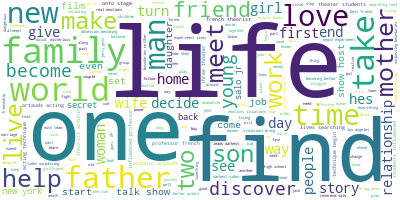

In [10]:
from wordcloud import WordCloud
long_string = ','.join(list(data['Plot'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [27]:
#LDA
from pprint import pprint
import gensim
import gensim.corpora as corpora

data_words = []
for row in data.itertuples():
    temp = str(getattr(row, 'Plot'))
    word_tokens = word_tokenize(temp, language='english',preserve_line=False)
    data_words.append(word_tokens)


id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1][0][:30])
num_topics = 10
lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)


[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [28]:
pprint(lda_model.print_topics())

[(0,
  '0.005*"time" + 0.005*"in" + 0.004*"the" + 0.004*"find" + 0.003*"one" + '
  '0.003*"life" + 0.003*"a" + 0.003*"when" + 0.003*"but" + 0.003*"new"'),
 (1,
  '0.006*"new" + 0.004*"a" + 0.004*"the" + 0.004*"one" + 0.004*"life" + '
  '0.004*"find" + 0.004*"friend" + 0.003*"when" + 0.003*"school" + '
  '0.003*"back"'),
 (2,
  '0.008*"the" + 0.005*"one" + 0.005*"life" + 0.004*"three" + 0.004*"young" + '
  '0.004*"lives" + 0.004*"new" + 0.003*"ever" + 0.003*"years" + '
  '0.003*"becoming"'),
 (3,
  '0.007*"the" + 0.005*"life" + 0.004*"one" + 0.004*"new" + 0.004*"a" + '
  '0.003*"man" + 0.003*"love" + 0.003*"lives" + 0.003*"world" + '
  '0.003*"family"'),
 (4,
  '0.006*"one" + 0.006*"life" + 0.006*"the" + 0.004*"family" + 0.004*"new" + '
  '0.003*"a" + 0.003*"school" + 0.003*"but" + 0.003*"however" + 0.003*"young"'),
 (5,
  '0.006*"the" + 0.004*"new" + 0.004*"life" + 0.004*"school" + 0.004*"a" + '
  '0.003*"when" + 0.003*"one" + 0.003*"help" + 0.003*"must" + '
  '0.003*"together"'),
 (6,